In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
# csv
df = pd.read_csv("../data/raw/train.csv")

In [3]:
df.shape

(233154, 41)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [5]:
df.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [6]:
# drop agreed upon columns

colnames = ['DISBURSED_AMOUNT',
 'ASSET_COST',
 'DATE_OF_BIRTH',
 'EMPLOYMENT_TYPE',
 'DISBURSAL_DATE',
 'DRIVING_FLAG',
 'PERFORM_CNS_SCORE',
 'PRI_NO_OF_ACCTS',
 'PRI_ACTIVE_ACCTS',
 'PRI_OVERDUE_ACCTS',
 'PRI_CURRENT_BALANCE',
 'PRI_SANCTIONED_AMOUNT',
 'PRI_DISBURSED_AMOUNT',
 'SEC_NO_OF_ACCTS',
 'SEC_ACTIVE_ACCTS',
 'SEC_OVERDUE_ACCTS',
 'SEC_CURRENT_BALANCE',
 'SEC_SANCTIONED_AMOUNT',
 'SEC_DISBURSED_AMOUNT',
 'PRIMARY_INSTAL_AMT',
 'SEC_INSTAL_AMT',
 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'AVERAGE_ACCT_AGE',
 'CREDIT_HISTORY_LENGTH',
 'NO_OF_INQUIRIES',
 'LOAN_DEFAULT']

df.drop(df.columns.difference(colnames), axis=1, inplace=True)

## Data transformation

In [7]:
df.select_dtypes(include=object)

,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,01-01-1984,Salaried,03-08-2018,0yrs 0mon,0yrs 0mon
1,31-07-1985,Self employed,26-09-2018,1yrs 11mon,1yrs 11mon
2,24-08-1985,Self employed,01-08-2018,0yrs 0mon,0yrs 0mon
3,30-12-1993,Self employed,26-10-2018,0yrs 8mon,1yrs 3mon
4,09-12-1977,Self employed,26-09-2018,0yrs 0mon,0yrs 0mon
...,...,...,...,...,...
233149,01-08-1988,Salaried,26-10-2018,1yrs 9mon,3yrs 3mon
233150,05-12-1988,Self employed,23-10-2018,0yrs 6mon,0yrs 6mon
233151,01-06-1976,Salaried,24-10-2018,0yrs 0mon,0yrs 0mon
233152,26-03-1994,Salaried,29-09-2018,0yrs 0mon,0yrs 0mon


In [8]:
# convert dates so that we can have years-months-days format to manipulate

df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'])


In [9]:
# convert dates to years? or days? I think days is better so that we dont have to worry about decimal points

# convert back to string to manipulate dates and remove "-" sign so that we can substract using Timestamp
df['DATE_OF_BIRTH'] = df['DATE_OF_BIRTH'].apply(lambda x: str(x).replace("-",""))
df['DISBURSAL_DATE'] = df['DISBURSAL_DATE'].apply(lambda x: str(x).replace("-",""))

df['DATE_OF_BIRTH'] = df['DATE_OF_BIRTH'].apply(lambda x: x.split()[0])
df['DISBURSAL_DATE'] = df['DISBURSAL_DATE'].apply(lambda x: x.split()[0])

# use timestamp to substract
df['DATE_OF_BIRTH'] = df['DATE_OF_BIRTH'].apply(lambda x: pd.Timestamp(x))
df['DISBURSAL_DATE'] = df['DISBURSAL_DATE'].apply(lambda x: pd.Timestamp(x))

# hard input todays date in a new column and subtract from dates column

df['TODAYS_DATE'] = pd.Timestamp('20211214')

df['LOANEE_DOB_DAYS'] = (df['TODAYS_DATE'] - df['DATE_OF_BIRTH']).dt.days
df['DISBURSAL_DATE_DAYS'] = (df['TODAYS_DATE'] - df['DISBURSAL_DATE']).dt.days

# drop TODAYS_DATE, DATE_OF_BIRTH, DISBURSAL_DATE column
drop_col = ['TODAYS_DATE','DATE_OF_BIRTH', 'DISBURSAL_DATE']
df.drop(columns=drop_col, axis=1, inplace=True)

In [10]:
# convert ages to days

df['AVERAGE_ACCT_AGE_DAYS'] = df['AVERAGE_ACCT_AGE'].apply(lambda x: (int(x.split()[0].replace("yrs",""))*365) + (int(x.split()[1].replace("mon",""))*30))
df['CREDIT_HISTORY_LENGTH_DAYS'] = df["CREDIT_HISTORY_LENGTH"].apply(lambda x: (int(x.split()[0].replace("yrs",""))*365) + (int(x.split()[1].replace("mon",""))*30))

# drop AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH
df.drop(columns=['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'], axis=1, inplace=True)

In [11]:
df

,DISBURSED_AMOUNT,ASSET_COST,EMPLOYMENT_TYPE,DRIVING_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,LOANEE_DOB_DAYS,DISBURSAL_DATE_DAYS,AVERAGE_ACCT_AGE_DAYS,CREDIT_HISTORY_LENGTH_DAYS
0,50578,58400,Salaried,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13862,1377,0,0
1,47145,65550,Self employed,0,598,1,1,1,27600,50200,...,1991,0,0,1,0,1,13285,1175,695,695
2,53278,61360,Self employed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13261,1436,0,0
3,57513,66113,Self employed,0,305,3,0,0,0,0,...,31,0,0,0,1,1,10211,1145,240,455
4,52378,60300,Self employed,0,0,0,0,0,0,0,...,0,0,0,0,1,1,16164,1175,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,Salaried,0,735,4,3,0,390443,416133,...,4084,0,0,0,0,0,12394,1145,635,1185
233150,73651,100600,Self employed,0,825,1,0,0,0,0,...,1565,0,0,0,0,0,12269,1148,180,180
233151,33484,71212,Salaried,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16779,1147,0,0
233152,34259,73286,Salaried,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10125,1172,0,0


## Outlier exploration and handling

In [12]:
numerical = df.select_dtypes(exclude=object)

In [13]:
def outlier_checker(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    LL = q1 - 1.5 * IQR
    UL = q3 + 1.5 * IQR
    return LL, UL

for i in numerical.columns:
    print(i, outlier_checker(df, i))

DISBURSED_AMOUNT (27243.0, 80315.0)
ASSET_COST (45489.875, 99428.875)
DRIVING_FLAG (0.0, 0.0)
PERFORM_CNS_SCORE (-1017.0, 1695.0)
PRI_NO_OF_ACCTS (-4.5, 7.5)
PRI_ACTIVE_ACCTS (-1.5, 2.5)
PRI_OVERDUE_ACCTS (0.0, 0.0)
PRI_CURRENT_BALANCE (-52509.75, 87516.25)
PRI_SANCTIONED_AMOUNT (-93750.0, 156250.0)
PRI_DISBURSED_AMOUNT (-91200.0, 152000.0)
SEC_NO_OF_ACCTS (0.0, 0.0)
SEC_ACTIVE_ACCTS (0.0, 0.0)
SEC_OVERDUE_ACCTS (0.0, 0.0)
SEC_CURRENT_BALANCE (0.0, 0.0)
SEC_SANCTIONED_AMOUNT (0.0, 0.0)
SEC_DISBURSED_AMOUNT (0.0, 0.0)
PRIMARY_INSTAL_AMT (-2998.5, 4997.5)
SEC_INSTAL_AMT (0.0, 0.0)
NEW_ACCTS_IN_LAST_SIX_MONTHS (0.0, 0.0)
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS (0.0, 0.0)
NO_OF_INQUIRIES (0.0, 0.0)
LOAN_DEFAULT (0.0, 0.0)
LOANEE_DOB_DAYS (2529.0, 24601.0)
DISBURSAL_DATE_DAYS (1059.5, 1295.5)
AVERAGE_ACCT_AGE_DAYS (-592.5, 987.5)
CREDIT_HISTORY_LENGTH_DAYS (-1095.0, 1825.0)


In [14]:
def boxplot_plot(df, col):
    plt.boxplot(x=col, vert=False, data=df)
    plt.show()

DISBURSED_AMOUNT


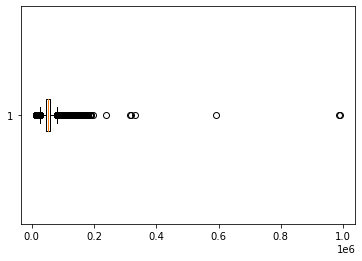

ASSET_COST


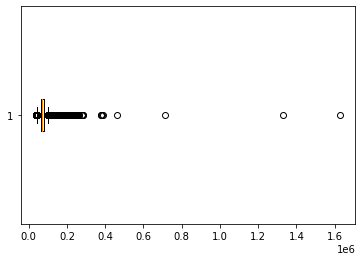

DRIVING_FLAG


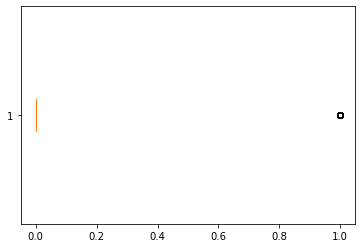

PERFORM_CNS_SCORE


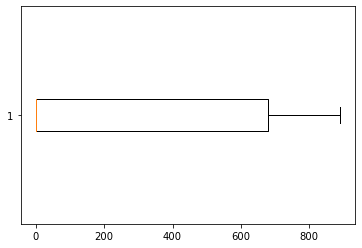

PRI_NO_OF_ACCTS


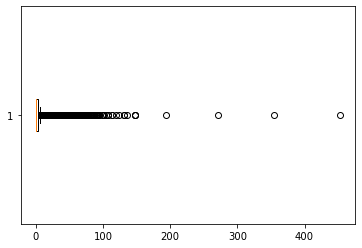

PRI_ACTIVE_ACCTS


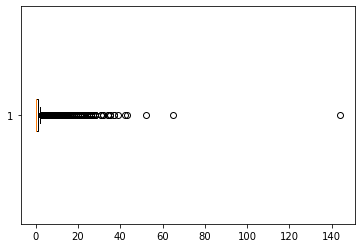

PRI_OVERDUE_ACCTS


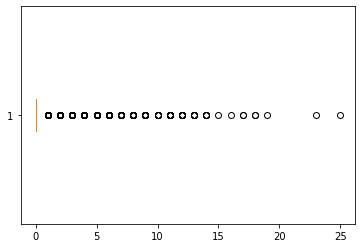

PRI_CURRENT_BALANCE


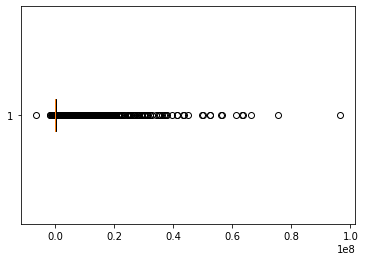

PRI_SANCTIONED_AMOUNT


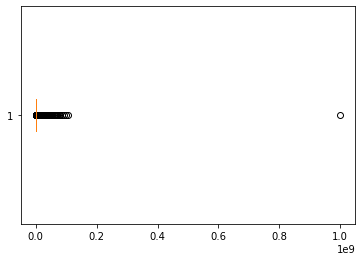

PRI_DISBURSED_AMOUNT


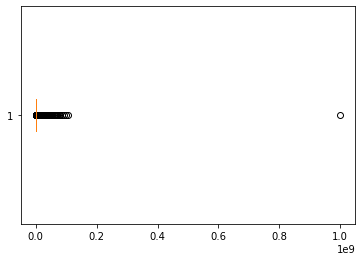

SEC_NO_OF_ACCTS


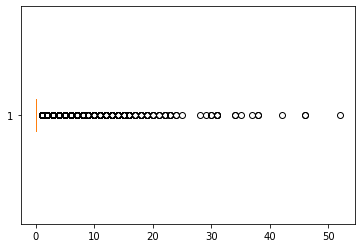

SEC_ACTIVE_ACCTS


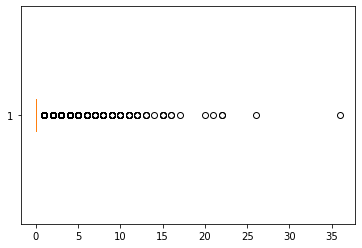

SEC_OVERDUE_ACCTS


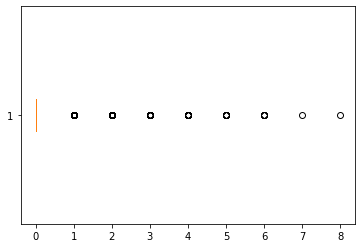

SEC_CURRENT_BALANCE


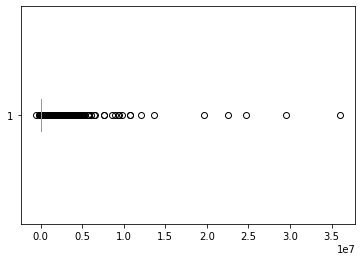

SEC_SANCTIONED_AMOUNT


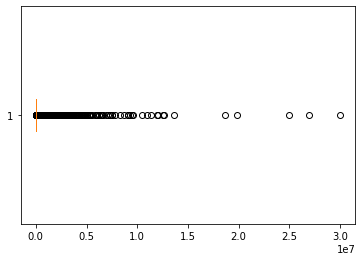

SEC_DISBURSED_AMOUNT


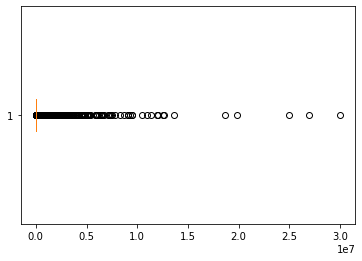

PRIMARY_INSTAL_AMT


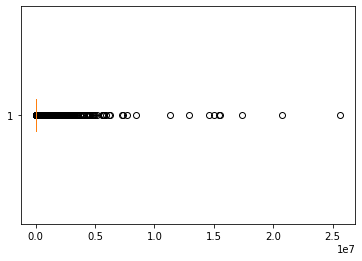

SEC_INSTAL_AMT


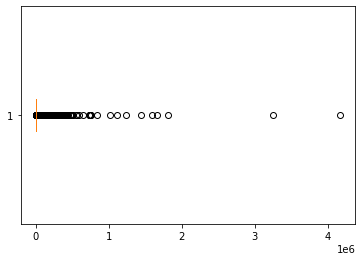

NEW_ACCTS_IN_LAST_SIX_MONTHS


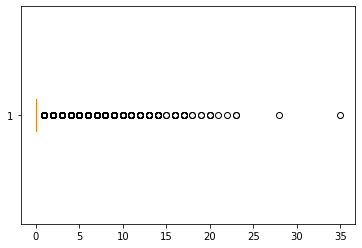

DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS


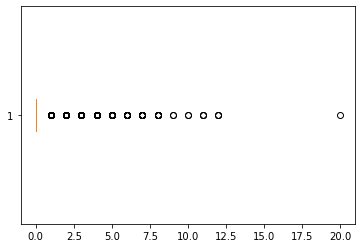

NO_OF_INQUIRIES


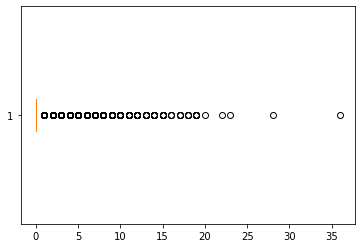

LOAN_DEFAULT


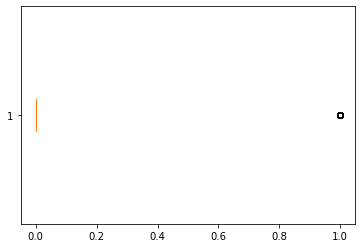

LOANEE_DOB_DAYS


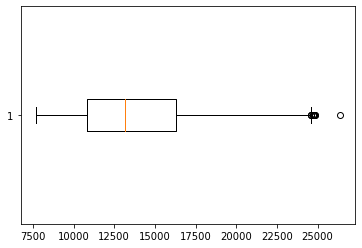

DISBURSAL_DATE_DAYS


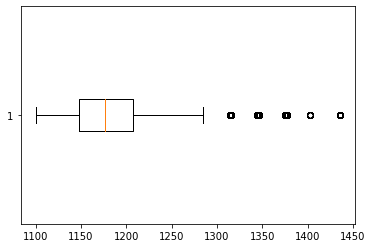

AVERAGE_ACCT_AGE_DAYS


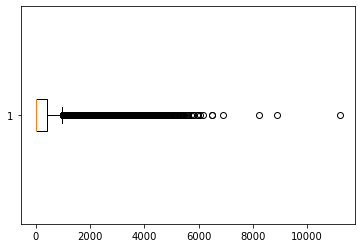

CREDIT_HISTORY_LENGTH_DAYS


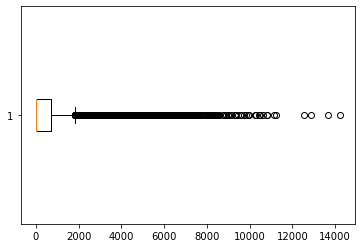

In [15]:
for i in numerical.columns:
    print(i)
    boxplot_plot(df, i)

In [20]:
# def outlier_remover(df, col):
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     IQR = q3 - q1
#     LL = q1 - 1.5 * IQR
#     UL = q3 + 1.5 * IQR
#     df = df[df[col] < UL]
#     df = df[df[col] > LL]
#     return df

In [16]:
# Hard remove outliers

# remove outlier of disbusred
df.drop(index=df[df['PRI_DISBURSED_AMOUNT'] > 7000000].index, axis=0, inplace=True)

# remove outliers of NO_OF_ACCTS that are greater than 7.5 (total loans at the time of disbursement)
df.drop(index=df[df['PRI_NO_OF_ACCTS'] > 10].index, axis=0, inplace=True)

# remove outliers of ACTIVE_ACCTS greater than 5 (active loans at the time of disburesment)
df.drop(index=df[df['PRI_ACTIVE_ACCTS'] > 5].index, axis=0, inplace=True)

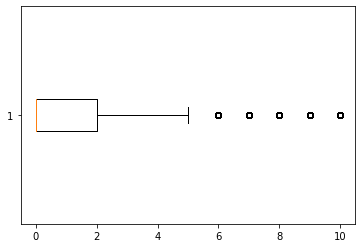

In [17]:
plt.boxplot(x='PRI_NO_OF_ACCTS', data=df, vert=False);

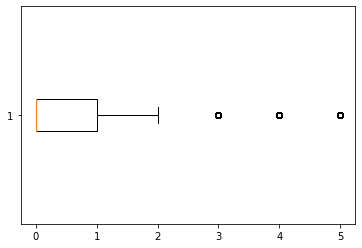

In [18]:
plt.boxplot(x='PRI_ACTIVE_ACCTS', data=df, vert=False);

In [19]:
df.shape

(217506, 27)

## Check nulls

In [20]:
# check null percentage
df.isna().sum()/len(df)*100

DISBURSED_AMOUNT                       0.00000
ASSET_COST                             0.00000
EMPLOYMENT_TYPE                        3.33554
DRIVING_FLAG                           0.00000
PERFORM_CNS_SCORE                      0.00000
PRI_NO_OF_ACCTS                        0.00000
PRI_ACTIVE_ACCTS                       0.00000
PRI_OVERDUE_ACCTS                      0.00000
PRI_CURRENT_BALANCE                    0.00000
PRI_SANCTIONED_AMOUNT                  0.00000
PRI_DISBURSED_AMOUNT                   0.00000
SEC_NO_OF_ACCTS                        0.00000
SEC_ACTIVE_ACCTS                       0.00000
SEC_OVERDUE_ACCTS                      0.00000
SEC_CURRENT_BALANCE                    0.00000
SEC_SANCTIONED_AMOUNT                  0.00000
SEC_DISBURSED_AMOUNT                   0.00000
PRIMARY_INSTAL_AMT                     0.00000
SEC_INSTAL_AMT                         0.00000
NEW_ACCTS_IN_LAST_SIX_MONTHS           0.00000
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    0.00000
NO_OF_INQUIRI

In [21]:
# fill nulls with mode
emp_mode = df['EMPLOYMENT_TYPE'].mode()
df['EMPLOYMENT_TYPE'].fillna(emp_mode[0], inplace=True)

In [22]:
df['EMPLOYMENT_TYPE'].isna().sum()/len(df)*100

0.0

## Feature Engineering

In [23]:
df['PERFORM_CNS_SCORE']

0           0
1         598
2           0
3         305
4           0
         ... 
233149    735
233150    825
233151      0
233152      0
233153      0
Name: PERFORM_CNS_SCORE, Length: 217506, dtype: int64

In [24]:
# binning PERFORM_CNS_SCORE to 5 bins, (very_low, low, medium, high, very_high)
labels = ["Very low", "Low", "Medium", "High", "Very high"]
df['PERFORM_CNS_DESC'] = pd.cut(df['PERFORM_CNS_SCORE'], 5, labels=labels)
df.groupby('PERFORM_CNS_DESC')['PERFORM_CNS_SCORE'].agg(['min', 'max', 'count'])

,min,max,count
PERFORM_CNS_DESC,,,
Very low,0,18,129661
Low,300,356,7878
Medium,357,534,6638
High,535,712,32102
Very high,713,890,41227


> Verify binning

In [25]:
df[df['PERFORM_CNS_SCORE'] < df['PERFORM_CNS_SCORE'].max()/5]['PERFORM_CNS_SCORE'].max()

18

In [26]:
df[df['PERFORM_CNS_SCORE'] < (df['PERFORM_CNS_SCORE'].max()/5)*2]['PERFORM_CNS_SCORE'].max()

355

In [27]:
df[df['PERFORM_CNS_SCORE'] < (df['PERFORM_CNS_SCORE'].max()/5)*3]['PERFORM_CNS_SCORE'].max()

533

In [28]:
df[df['PERFORM_CNS_SCORE'] < (df['PERFORM_CNS_SCORE'].max()/5)*4]['PERFORM_CNS_SCORE'].max()

711

In [29]:
df.drop(columns='PERFORM_CNS_SCORE', axis=1, inplace=True)

In [30]:
df.shape

(217506, 27)

In [31]:
# Extract new feature called loan to asset ratio (LTA)

df['LTA'] = round(df['DISBURSED_AMOUNT']/df['ASSET_COST']*100, 2)

In [32]:
df.shape

(217506, 28)

## Convert categorical to dummy variables

In [33]:
# convert dummy variables of EMPLOYMENT_TYPE and PERFORM_CNS_DESC

df = pd.get_dummies(df, drop_first=True)

In [34]:
df

,DISBURSED_AMOUNT,ASSET_COST,DRIVING_FLAG,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,...,LOANEE_DOB_DAYS,DISBURSAL_DATE_DAYS,AVERAGE_ACCT_AGE_DAYS,CREDIT_HISTORY_LENGTH_DAYS,LTA,EMPLOYMENT_TYPE_Self employed,PERFORM_CNS_DESC_Low,PERFORM_CNS_DESC_Medium,PERFORM_CNS_DESC_High,PERFORM_CNS_DESC_Very high
0,50578,58400,0,0,0,0,0,0,0,0,...,13862,1377,0,0,86.61,0,0,0,0,0
1,47145,65550,0,1,1,1,27600,50200,50200,0,...,13285,1175,695,695,71.92,1,0,0,1,0
2,53278,61360,0,0,0,0,0,0,0,0,...,13261,1436,0,0,86.83,1,0,0,0,0
3,57513,66113,0,3,0,0,0,0,0,0,...,10211,1145,240,455,86.99,1,1,0,0,0
4,52378,60300,0,0,0,0,0,0,0,0,...,16164,1175,0,0,86.86,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,0,4,3,0,390443,416133,416133,0,...,12394,1145,635,1185,59.97,0,0,0,0,1
233150,73651,100600,0,1,0,0,0,0,0,0,...,12269,1148,180,180,73.21,1,0,0,0,1
233151,33484,71212,0,0,0,0,0,0,0,0,...,16779,1147,0,0,47.02,0,0,0,0,0
233152,34259,73286,0,0,0,0,0,0,0,0,...,10125,1172,0,0,46.75,0,0,0,0,0


In [35]:
df.shape

(217506, 31)

In [36]:
# Export to csv
df.to_csv("../data/interim/data.csv", index=False)

<AxesSubplot:>

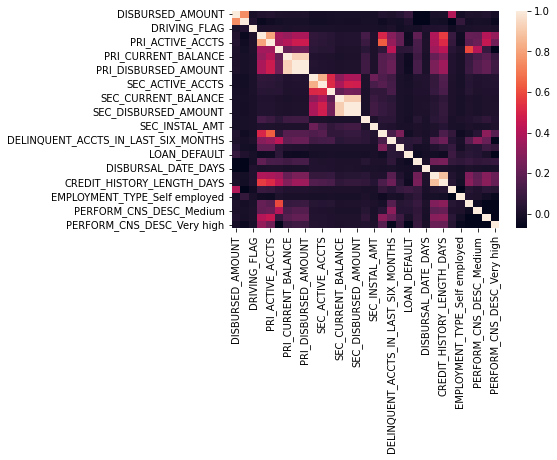

In [42]:
sns.heatmap(df.corr(), cmap='rocket', robust=True)